In [101]:
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [102]:
old_0 = pd.read_pickle('30_Sec/30_sec_0_pri_old.pkl')
new_0 = pd.read_pickle('30_0/30_sec_0_pri_new.pkl')
old_5 = pd.read_pickle('30_Sec/30_sec_5_pri_old.pkl')
new_5 = pd.read_pickle('30_5/30_10_new.pkl')
old_10 = pd.read_pickle('30_Sec/30_sec_10_pri_old.pkl')
new_10 = pd.read_pickle('30_10/30_sec_10_pri_new.pkl')
old_15 = pd.read_pickle('30_Sec/30_sec_15_pri_old.pkl')
new_15 = pd.read_pickle('30_15/30_sec_15_pri_new.pkl')
old_20 = pd.read_pickle('30_Sec/30_sec_20_pri_old.pkl')
new_20 = pd.read_pickle('30_20/30_sec_20_pri_new.pkl')
old_25 = pd.read_pickle('30_25/30_sec_25_pri_old.pkl')
new_25 = pd.read_pickle('30_25/30_sec_25_pri_new.pkl')
old_30 = pd.read_pickle('30_30/30_sec_30_pri_old.pkl')
new_30 = pd.read_pickle('30_30/30_sec_30_pri_new.pkl')

In [103]:
frames_old = [old_0,old_5,old_10,old_15,old_20,old_25,old_30]
frames_new = [new_0,new_5,new_10,new_15,new_20,new_25,new_30]

In [104]:
olds = pd.concat(frames_old)
news = pd.concat(frames_new)

In [105]:
olds.reset_index(inplace=True, drop=True)
news.reset_index(inplace=True, drop=True)

In [106]:
olds['number_of_pus'] = [0, 5, 10, 15, 20, 25, 30]
news['number_of_pus'] = [0, 5, 10, 15, 20, 25, 30]

In [107]:
olds.set_index(['number_of_pus'],inplace=True, drop=True)
news.set_index(['number_of_pus'],inplace=True, drop=True)

In [128]:
#Data generated using the old algorithm
olds

,Sent,Received,Routing_Packets,PDF,NRL,Average_e-e_delay(ms),Dropped_Packets,Dropped_Bytes,PacketLoss[%]
number_of_pus,,,,,,,,,
0,81238,80041,189808,98.53,2.37,48.86,1196,1219920,1.47
5,81238,76078,170158,93.65,2.24,50.62,5158,5261160,6.35
10,81238,53977,166393,66.44,3.08,420.10,27260,27805200,33.56
15,81238,34358,120943,42.29,3.52,645.51,46184,47107680,56.85
20,81238,34358,120943,42.29,3.52,645.51,46184,47107680,56.85
25,81238,43335,106183,53.34,2.45,547.61,37709,38463180,46.42
30,81238,23749,80997,29.23,3.41,672.62,56515,57645300,69.57


In [129]:
#Data generated using the new algorithm
news

,Sent,Received,Routing_Packets,PDF,NRL,Average_e-e_delay(ms),Dropped_Packets,Dropped_Bytes,PacketLoss[%]
number_of_pus,,,,,,,,,
0,81238,80354,181002,98.91,2.25,63.81,881,898620,1.08
5,81238,75929,177188,93.46,2.33,55.76,5308,5414160,6.53
10,81238,77198,213948,95.03,2.77,59.84,4039,4119780,4.97
15,81238,77086,175937,94.89,2.28,51.51,4152,4235040,5.11
20,81238,44759,112990,55.10,2.52,454.77,36411,37139220,44.82
25,81238,43548,108690,53.61,2.50,464.17,37498,38247960,46.16
30,81238,22898,77980,28.19,3.41,596.95,57300,58446000,70.53


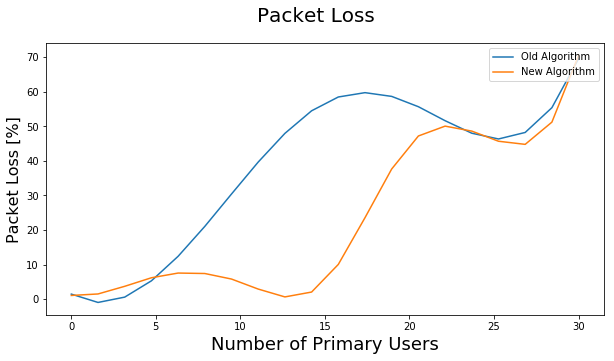

In [130]:
from scipy.interpolate import spline
from numpy import array, linspace

xnew = linspace(olds.index.min(),olds.index.max(),20)

ysmooth1 = spline(olds.index,olds['PacketLoss[%]'],xnew)
ysmooth2 = spline(news.index,news['PacketLoss[%]'],xnew)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Packet Loss', fontsize=20)
plt.xlabel('Number of Primary Users', fontsize=18)
plt.ylabel('Packet Loss [%]', fontsize=16)
plt.plot(xnew,ysmooth1, label='Old Algorithm')
plt.plot(xnew,ysmooth2, label='New Algorithm')
plt.legend(loc='upper right')
plt.show()

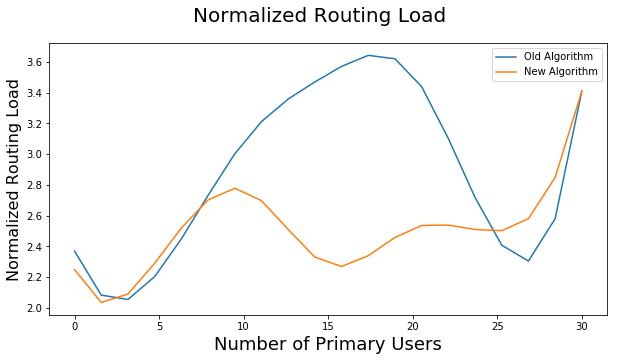

In [131]:
ysmooth1 = spline(olds.index,olds['NRL'],xnew)
ysmooth2 = spline(news.index,news['NRL'],xnew)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Normalized Routing Load', fontsize=20)
plt.xlabel('Number of Primary Users', fontsize=18)
plt.ylabel('Normalized Routing Load', fontsize=16)
plt.plot(xnew,ysmooth1, label='Old Algorithm')
plt.plot(xnew,ysmooth2, label='New Algorithm')
plt.legend(loc='upper right')
plt.show()

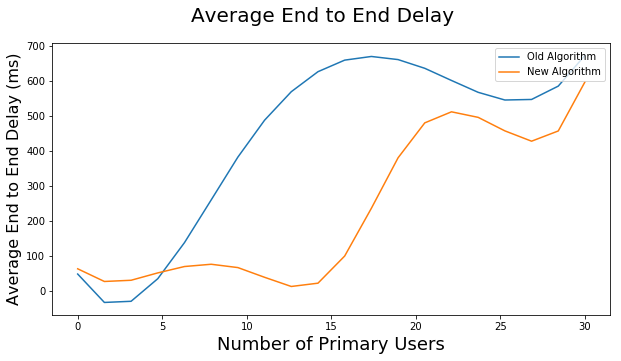

In [132]:
ysmooth1 = spline(olds.index,olds['Average_e-e_delay(ms)'],xnew)
ysmooth2 = spline(news.index,news['Average_e-e_delay(ms)'],xnew)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Average End to End Delay', fontsize=20)
plt.xlabel('Number of Primary Users', fontsize=18)
plt.ylabel('Average End to End Delay (ms)', fontsize=16)
plt.plot(xnew,ysmooth1, label='Old Algorithm')
plt.plot(xnew,ysmooth2, label='New Algorithm')
plt.legend(loc='upper right')
plt.show()

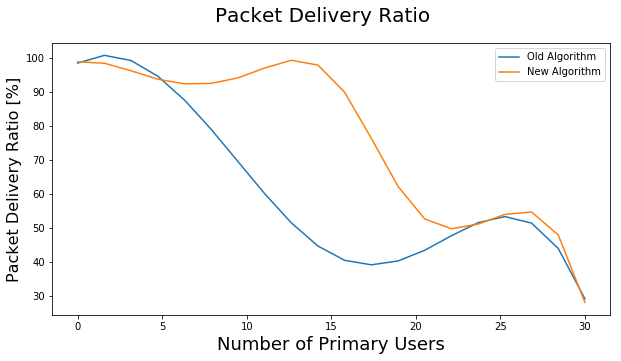

In [133]:
ysmooth1 = spline(olds.index,olds['PDF'],xnew)
ysmooth2 = spline(news.index,news['PDF'],xnew)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Packet Delivery Ratio', fontsize=20)
plt.xlabel('Number of Primary Users', fontsize=18)
plt.ylabel('Packet Delivery Ratio [%]', fontsize=16)
plt.plot(xnew,ysmooth1, label='Old Algorithm')
plt.plot(xnew,ysmooth2, label='New Algorithm')
plt.legend(loc='upper right')
plt.show()